In [52]:
import numpy as np
import seaborn as sns
import random
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from collections import namedtuple
from scipy.stats import chi2_contingency

In [53]:
grades_control = [15, 32, 0, 5, 27, 14, 30, 22, 30, 0, 30, 12, 14, 0, 30, 12, 21, 1, 18, 2, 18, 35, 31, 26, 21, 17, 36, 0, 0, 35, 4, 33, 0, 25, 60, 0, 20, 56, 22, 31, 36, 46, 0, 30, 0, 48, 27]
grades_treatment = [28, 22, 2, 18, 33, 35, 15, 27, 36, 9, 8, 16, 25, 8, 3, 25, 40, 23, 37, 7, 20, 29, 22, 37, 37, 26, 35, 8, 30, 0, 0, 20, 0, 42, 23, 22, 38, 0, 38, 20, 39, 40, 20, 20, 40, 31, 28]

## Testing if control and treatment test groups grades are normally distributed 

One of the most common methods for testing data normality is using various statistical tests. In data analysis, the Kolmogorov-Smirnov test and the Shapiro-Wilk test are commonly used. First, a significance level, $\alpha$, is set (usually $0.05$, but different fields may have their own commonly accepted values). Based on the obtained test statistics, a $p-value$ is calculated, and decisions to either accept or reject the hypothesis are based on the $p-value$ thresholds.

In [54]:
def test_normality_shapiro_wilk(*datasets, alpha = 0.05): #Shapiro-Wilk test
    for data in datasets:
        statistic, p_value = stats.shapiro(data)
        print(f"Test statistic: {statistic}")
        print(f"P-value: {p_value}")
        if p_value > alpha:
            print("The data appears to be normally distributed.")
        else:
            print("The data does not appear to be normally distributed.")

def test_normality_k0lmogorov_smirnow(*datasets, alpha = 0.05): #Kolmogorov-Smirnov test
    for data in datasets:
        statistic, p_value = stats.kstest(data, 'norm')
        print(f"Test statistic: {statistic}")
        print(f"P-value: {p_value}")
        if p_value > alpha:
            print("The data appears to be normally distributed.")
        else:
            print("The data does not appear to be normally distributed.")        

In [55]:
test_normality_k0lmogorov_smirnow(grades_control, grades_treatment)

Test statistic: 0.7659257755666775
P-value: 2.309010710107813e-29
The data does not appear to be normally distributed.
Test statistic: 0.8922671232449656
P-value: 6.732131342173193e-46
The data does not appear to be normally distributed.


In [56]:
test_normality_shapiro_wilk(grades_control, grades_treatment)

Test statistic: 0.9319185018539429
P-value: 0.008905872702598572
The data does not appear to be normally distributed.
Test statistic: 0.9323437213897705
P-value: 0.009231587871909142
The data does not appear to be normally distributed.


Other popular and more demonstrative method of oberving is data normally distributed or not is building so called QQ plots. QQ plot, also known as a quantile-quantile plot, is a graphical tool used to assess the distributional similarity between two datasets. It compares the quantiles of the observed data against the quantiles of a theoretical distribution, typically a standard normal distribution. If the points on the QQ plot fall along a straight line (in other words, points belong to the graph $y = x$), it suggests that the data can be reasonably approximated by the reference distribution (in our case it's normal distribution).

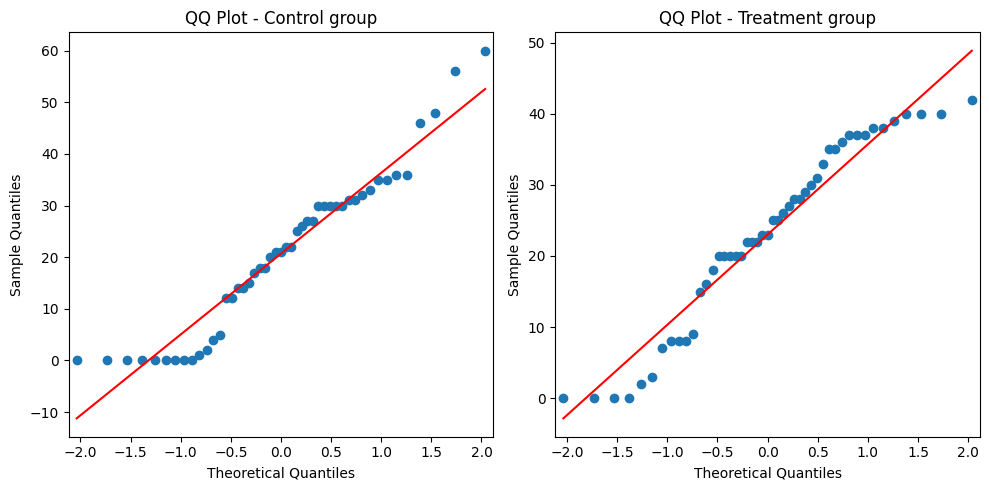

In [57]:
def plot_qq(data_list):
    num_plots = len(data_list)
    fig, axes = plt.subplots(nrows = 1, ncols = num_plots, figsize = (5*num_plots, 5))

    for i, data in enumerate(data_list):
        ax = axes[i] if num_plots > 1 else axes
        sm.qqplot(data, line = 's', ax = ax)  # 's' for standardized line, '45' for 45-degree line

        if i == 0:
            ax.set_title(f'QQ Plot - Control group')
        else:
            ax.set_title(f'QQ Plot - Treatment group')
        ax.set_xlabel("Theoretical Quantiles")
        ax.set_ylabel("Sample Quantiles")

    plt.tight_layout()
    plt.show()

datasets = list(map(np.array, [grades_control, grades_treatment]))
plot_qq(datasets)

As we can see, a large portion of the data values from the samples still fall on the straight line of the plot, which actually leads us to believe that the data is normally distributed. However, there is a noticeable number of values that fall outside the expected straight line, and that's why formal mathematical tests tell us that we should reject our null hypothesis of data normality. Nevertheless, from a more practical standpoint, we can still accept it to some extent.

It would be helpful to plot a histogram of our data to visualize it more effectively. A histogram displays the distribution of values by dividing the range of values into intervals (bins) and showing the frequency or count of data points falling within each bin.

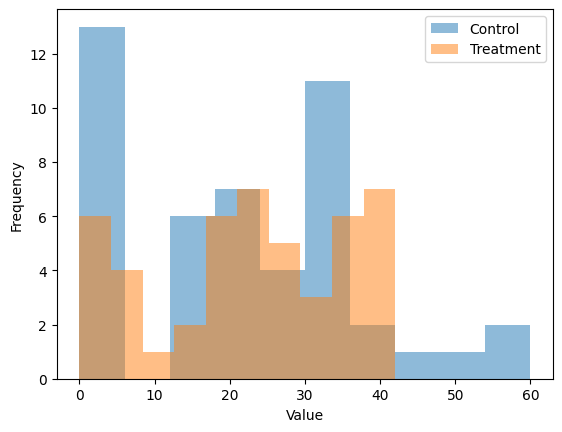

In [58]:
def double_plot(dataset_1, dataset_2, bins = 10):
    plt.hist(grades_control, bins = bins, alpha = 0.5, label = 'Control')
    plt.hist(grades_treatment, bins = bins, alpha = 0.5, label = 'Treatment')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

double_plot(grades_control, grades_treatment)

As we can see, certain portions of the histogram (specifically in the middle) clearly resemble a normal distribution (this aligns with the observation we made when constructing the QQ plot)

The next step will involve checking the independence of the data. For this purpose, we will use the chi-square test.
The chi-square test is a statistical method used to determine if there is a significant association between two categorical variables. It compares the observed frequencies in different categories with the frequencies that would be expected if the variables were independent.

In [59]:
def chi_square_independence_test(sample1, sample2):
    contingency_table = np.array([[sample1.count(0), sample2.count(0)],
                                  [sample1.count(1), sample2.count(1)]]) + 0.01

    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    alpha = 0.05
    if p_value < alpha:
        return "There is a significant association between the samples. Reject the null hypothesis."
    else:
        return "There is no significant association between the samples. Fail to reject the null hypothesis."

In [60]:
chi_square_independence_test(grades_control, grades_treatment)

'There is no significant association between the samples. Fail to reject the null hypothesis.'


This test has shown us that we cannot refute the hypothesis that the selected data is independent. This is good because for conducting an A/B test, the chosen samples must necessarily be independent for the purity of the experiment. On the other hand, we may have external knowledge that the data is indeed independent, but the test will indicate that they are dependent. Such situations may arise, for example, when the samples are too similar to each other in terms of values.

In [61]:
mean_control = np.mean(grades_control)
mean_treatment = np.mean(grades_treatment)
print(f'{mean_control=}')
print(f'{mean_treatment=}')

mean_control=20.680851063829788
mean_treatment=23.02127659574468


In [12]:
#Написать функцию Т-статистики, Мана-Витни, Z-тест вручную

In [85]:
ExperimentComparisonResults = namedtuple('ExperimentComparisonResults', 
                                        ['pvalue', 'effect', 'ci_length', 'left_bound', 'right_bound'])

def t_test(control, test):
    mean_control = np.mean(control)
    mean_test = np.mean(test)
    
    difference_mean = mean_test - mean_control 
    difference_var = np.var(control)/len(control) + np.var(test)/len(test)
    difference_distribution = stats.norm(loc = difference_mean, scale = np.sqrt(difference_var))
    
    left_bound, right_bound = difference_distribution.ppf([0.025, 0.975])
    ci_lenght = right_bound - left_bound
    p_value = 2*min(difference_distribution.cdf(0), difference_distribution.sf(0))
    effect = difference_mean
    
    return ExperimentComparisonResults(p_value, effect, ci_lenght, left_bound, right_bound)
    
t_test(grades_control, grades_treatment)

ExperimentComparisonResults(pvalue=0.426182810773734, effect=2.3404255319148923, ci_length=11.529258719233178, left_bound=-3.4242038277016977, right_bound=8.10505489153148)

In [62]:
t_statistic, p_value = stats.ttest_ind(grades_control, grades_treatment)
alpha = 0.05
if p_value > alpha:
    print(f'There is no significance difference, P-value: {p_value}')
else:
    print(f'There is significance difference, P-value: {p_value}')

There is no significance difference, P-value: 0.4331707489925759


Since our metrics are only partially normal, it makes sense to consider the nonparametric Mann-Whitney method. It allows us to determine if there is a statistical difference between the samples or not. One advantage is that it can be applied in almost any scenario. However, as is often the case, there is a fly in every ointment. The thing is, this test often provides less reliable results. Additionally, it does not allow us to assess the metrics of interest from a business perspective (such as mean or median); it merely determines the statistical difference between the samples (and not always correctly). Therefore, it is advisable to approach its results with some skepticism.

In [ ]:
def mann_whitneyu(control, test):
    
    combined = np.concatenate([x, y])
    ranks = rankdata(combined)

    ranks_x = ranks[:len(x)]
    ranks_y = ranks[len(x):]

    U1 = np.sum(ranks_x) - (len(x) * (len(x) + 1) / 2)

    U2 = np.sum(ranks_y) - (len(y) * (len(y) + 1) / 2)

    U = min(U1, U2)

    # Calculate the total number of possible permutations
    total_permutations = len(x) * len(y)

    # Calculate the p-value
    p_value = 2 * min(U1, U2) / total_permutations

    return U, p_value    

In [63]:
statistic, p_value = stats.mannwhitneyu(grades_control, grades_treatment)

print(f"Test statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance based on the p-value
alpha = 0.05
if p_value > alpha:
    print("The distributions of the samples are not significantly different.")
else:
    print("The distributions of the samples are significantly different.")

Test statistic: 956.0
P-value: 0.2621973973695756
The distributions of the samples are not significantly different.


So, the tests tell us that there is no statistical difference between the samples, even though the mean in the test group is obviously higher than in the control group. Indeed, one of the reasons for this behavior is the small number of values in the samples. To address this, we can use the method outlined below.

## Bootstrap technique


Оne of the commonly used methods in applied statistics and product analytics is the bootstrap method. Suppose we have a sample of values, and we want to construct a confidence interval for its mean, but we have a limited set of data points (which is often the case in practice when obtaining new values is financially or time-consuming). In such cases, the following approach is taken: a large number of iterations (e.g., several thousand) is specified, and we create bootstrap samples by resampling from the available data with the same number of elements. Based on these bootstrap samples, we calculate the sample mean, confidence interval, and other relevant statistics of interest.

In [19]:
def bootstrap(data, number_bootstrap = 5000): #Performing bootstrap resampling on the data.
    n_samples = len(data)
    bootstrap_samples = []
    
    for _ in range(number_bootstrap):
        sample = random.choices(data, k = n_samples)
        bootstrap_samples.append(np.mean(sample))
    
    return bootstrap_samples

bootstrap_samples_control = bootstrap(grades_control)
bootstrap_samples_treatment = bootstrap(grades_treatment)

confidence_interval_control = np.percentile(bootstrap_samples_control, [2.5, 97.5])
confidence_interval_treatment = np.percentile(bootstrap_samples_treatment, [2.5, 97.5])

print("Bootstrap 95% Confidence Interval for control group: [{:.2f}, {:.2f}]".format(confidence_interval_control[0], confidence_interval_control[1]))
print("Bootstrap 95% Confidence Interval for treatment group: [{:.2f}, {:.2f}]".format(confidence_interval_treatment[0], confidence_interval_treatment[1]))

Bootstrap 95% Confidence Interval for control group: [16.19, 25.19]
Bootstrap 95% Confidence Interval for treatment group: [18.48, 26.07]



Based on the obtained confidence interval, it is clear that the average rating in the other group is generally higher than in the control group, despite the mathematical tests suggesting the opposite. This once again demonstrates the importance of not only relying on hypothesis testing alone but also incorporating interval estimation when addressing such problems.

In [83]:
def poisson_bootstrap_variance(data, num_samples):
    n = len(data)
    bootstrap_samples = np.zeros((num_samples, n))

    for i in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_samples[i] = bootstrap_sample
    
    bootstrap_variances = np.var(bootstrap_samples, axis=1)
    return bootstrap_variances

bootstrap_variances = poisson_bootstrap_variance(grades_control, 100000)
confidence_interval = np.percentile(bootstrap_variances, [2.5, 97.5])

print("Bootstrap Variances:", bootstrap_variances)
print("Confidence Interval:", confidence_interval) #As we can see, the results are not very useful if we using poisson bootstrap

Bootstrap Variances: [217.64689905 263.31552739 233.41330919 ... 179.59529199 274.21095518
 232.73517429]
Confidence Interval: [160.14574468 333.56385242]


Unfortunately, this method didn't provide us much help, as evident from an unusually large estimated variance. This is primarily due to the presence of extreme values (0 or 40) in our both control and treatment group samples, which significantly distorts the overall picture in our case.


One method to combat high variance in a sample is the so-called Controlled Pre-Experiment Test, which utilizes historical data from a company to conduct and derive the T-test estimate. Suppose we introduce a certain change in the product, and we are not satisfied with the analysis results. In such a case, we can proceed as follows: subtract a statistic that reduces variance. To do this, we take the old data collected before the experiment itself, and instead of considering the difference between the means of the control and test groups, we consider the difference with these data subtracted. Theoretically, this can be justified by the fact that the expected value of the difference in means with the subtracted data will coincide with the expected value of the regular difference because no changes were made prior to this, and therefore the means should be equal in such a case.

So, let's add some history information about our grades

In [66]:
grades_before_control = np.random.normal(loc = 20, scale = 10, size = 47)
grades_before_treatment = np.random.normal(loc = 20, scale = 10, size = 47)

grades_control = np.array(grades_control)
grades_treatment = np.array(grades_treatment)

In [81]:
def cuped_ttest(control, test, control_before, test_before): #Performing Controlled-experiment Using Pre-Experiment Data method for variance
    theta = ((np.cov(control, control_before)[0, 1] + np.cov(test, test_before)[0, 1])/
    (np.var(control_before) + np.var(test_before)))

    control_cup = control - theta * control_before
    test_cup = test - theta * test_before
    return t_test(control_cup, test_cup)

cuped_ttest(grades_control, grades_treatment, grades_before_control, grades_before_treatment)



ExperimentComparisonResults(pvalue=0.5697368995753631, effect=1.6552258303009566, ci_length=11.41435715915807, left_bound=-4.05195274927808, right_bound=7.362404409879991)


As we can see, the length of the confidence interval for the observed effect has indeed decreased. Although the reduction is small, it can be useful from a practical standpoint.

## Conclusion

In this A/B test, we were testing the hypothesis of whether the new teaching methodology would contribute to improving academic performance. Taking two samples (treatment and control), we applied multiple tests and various methods to these data, testing the hypothesis of the difference in mean scores between these samples. Although the statistical tests indicate that there is no significant difference, the constructed confidence intervals suggest otherwise: the lower bound is strictly higher by two whole points, which can be quite important. As a data analyst, I would be inclined __not to adopt the new teaching technique since the mathematical tests indicate no statistical significance. However, I would still advocate for extending the experiment and collecting a larger sample size for testing, as there are indirect indications that there might be an effect (due to the confidence intervals).__